In [1]:
from datetime import datetime

In [2]:
now = datetime.now()

In [4]:
now

datetime.datetime(2021, 6, 2, 15, 44, 39, 167469)

In [5]:
from datetime import timedelta

In [6]:
start = datetime(2011, 1, 7)

In [7]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [11]:
import pandas as pd
import numpy as np

In [13]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
rng

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [15]:
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [16]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [17]:
ts.resample('5min', closed='right').mean()

1999-12-31 23:55:00     0
2000-01-01 00:00:00     3
2000-01-01 00:05:00     8
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [20]:
frame = pd.DataFrame(np.random.randn(2,4),
                    index=pd.date_range("1/1/2000",periods=2, freq='W-WED'),
                    columns=["a","b","c","d"])
frame

,a,b,c,d
2000-01-05,1.422358,1.340852,0.064892,0.572094
2000-01-12,0.256016,0.349739,-0.344858,-0.579309


In [21]:
df_daily = frame.resample('D').asfreq() #'D'=Daily
df_daily #NaN 값 채워야됨

,a,b,c,d
2000-01-05,1.422358,1.340852,0.064892,0.572094
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.256016,0.349739,-0.344858,-0.579309


In [22]:
frame.resample('D').ffill()

,a,b,c,d
2000-01-05,1.422358,1.340852,0.064892,0.572094
2000-01-06,1.422358,1.340852,0.064892,0.572094
2000-01-07,1.422358,1.340852,0.064892,0.572094
2000-01-08,1.422358,1.340852,0.064892,0.572094
2000-01-09,1.422358,1.340852,0.064892,0.572094
2000-01-10,1.422358,1.340852,0.064892,0.572094
2000-01-11,1.422358,1.340852,0.064892,0.572094
2000-01-12,0.256016,0.349739,-0.344858,-0.579309


<AxesSubplot:>

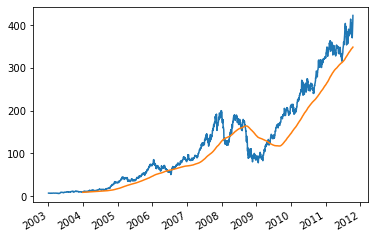

In [26]:
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [27]:
path = "datasets/bitly_usagov/example.txt"
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [30]:
import json
path = "datasets/bitly_usagov/example.txt"
records = [json.loads(line) for line in open(path,'rt',encoding='UTF-8')]
records[1]

{'a': 'GoogleMaps/RochesterNY',
 'c': 'US',
 'nk': 0,
 'tz': 'America/Denver',
 'gr': 'UT',
 'g': 'mwszkS',
 'h': 'mwszkS',
 'l': 'bitly',
 'hh': 'j.mp',
 'r': 'http://www.AwareMap.com/',
 'u': 'http://www.monroecounty.gov/etc/911/rss.php',
 't': 1331923249,
 'hc': 1308262393,
 'cy': 'Provo',
 'll': [40.218102, -111.613297]}

In [31]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [33]:
def get_counts(seq):
    counts={}
    for x in seq:
        if x in counts:
            counts[x]+=1
        else:
                counts[x]=1
    return counts

In [35]:
counts = get_counts(time_zones)
counts["America/New_York"]

1251

In [36]:
len(time_zones)

3440

In [37]:
frame = pd.DataFrame(records)

In [38]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [39]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [41]:
clean_tz = frame['tz'].fillna("Missing")
clean_tz[clean_tz==""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [42]:
import seaborn as sns

<AxesSubplot:>

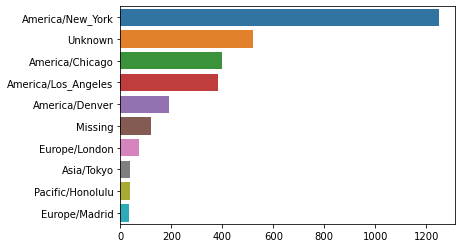

In [43]:
subset =tz_counts[:10]
sns.barplot(y=subset.index, x = subset.values)